## Importing Libraries

In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.metrics import accuracy_score
import nltk
import re


## Loading Dataset

In [2]:
# loading our dataset
df = pd.read_csv('spam.csv', encoding = 'latin-1')

In [3]:
# checking the first 5 rows of our data
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
# dropping the unnecessary columns Unnamed: 2, Unnamed: 3, Unnamed: 4
df = df.drop(labels = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1)

# renaming the existing column v1 as type, v2 as message
df = df.rename(columns = {'v1': 'type', 'v2': 'message'})

df.head()

,type,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Data Visualizations

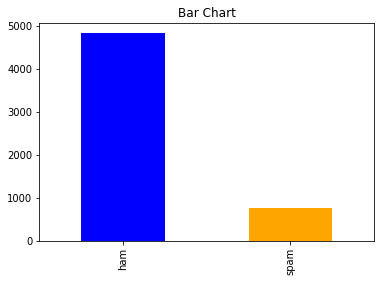

In [5]:
# bar chart
count_types = pd.value_counts(df['type'])
count_types.plot(kind = 'bar', color = ['blue', 'orange'])
plt.title('Bar Chart')
plt.show()

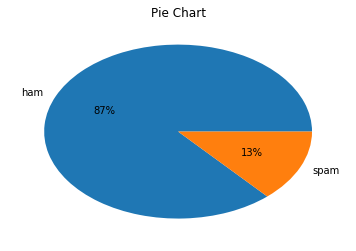

In [6]:
# pie chart
count_types.plot(kind = 'pie', autopct='%1.0f%%')
plt.ylabel('')
plt.title('Pie Chart')
plt.show()

## Data Preprocessing

In [7]:
# labeling ham as 0 and spam as 1
df['type'] = df.type.map({'ham':0, 'spam':1})

In [8]:
# splitting the columns
X = df['message']
y = df['type']

In [9]:
# converting X and y to numpy array
X = np.array(X)
y = np.array(y)

In [10]:
# coverting the message into lower case, as hello, Hello, HELLO means the same
for i in range(len(X)):
    X[i] = X[i].lower()
    
# first 5 messages after converting text into lower case
print(X[:5])

['go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...'
 'ok lar... joking wif u oni...'
 "free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005. text fa to 87121 to receive entry question(std txt rate)t&c's apply 08452810075over18's"
 'u dun say so early hor... u c already then say...'
 "nah i don't think he goes to usf, he lives around here though"]


In [11]:
# removing the extra spaces, digits and non word characters like punctuations, ascii etc.
for i in range(len(X)):
    X[i] = re.sub(r'\W',' ',X[i])
    X[i] = re.sub(r'\d',' ',X[i])
    X[i] = re.sub(r'\s+',' ',X[i])

# first 5 messages after removing the extras
print(X[:5])

['go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat '
 'ok lar joking wif u oni '
 'free entry in a wkly comp to win fa cup final tkts st may text fa to to receive entry question std txt rate t c s apply over s'
 'u dun say so early hor u c already then say '
 'nah i don t think he goes to usf he lives around here though']


In [12]:
# removing the stop words
from nltk.corpus import stopwords
for i in range(len(X)):
    words = nltk.word_tokenize(X[i])
    new_words = [word for word in words if word not in stopwords.words('english')]
    X[i] = ' '.join(new_words)
    
# first 5 messages after removing the stopwords
print(X[:5])

['go jurong point crazy available bugis n great world la e buffet cine got amore wat'
 'ok lar joking wif u oni'
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply'
 'u dun say early hor u c already say'
 'nah think goes usf lives around though']


In [13]:
# stemming - get the root of each word
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

for i in range(len(X)):
    words = nltk.word_tokenize(X[i])
    new_words = [stemmer.stem(word) for word in words]
    X[i] = ' '.join(new_words)

# first 5 messages after stemming
print(X[:5])

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat'
 'ok lar joke wif u oni'
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli'
 'u dun say earli hor u c alreadi say'
 'nah think goe usf live around though']


## Text Transformation: TF-IDF model

In [14]:
# creating the tf-idf model
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer('english')
X = vectorizer.fit_transform(X)

## Splitting the Dataset 

In [15]:
# splitting the dataset into test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Machine Learning Models

#### Multinomial Naive Bayes Classifier

In [16]:
# running multinomial naive bayes classifier
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha = 0.2)
clf = clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('Accuracy for Multinomial Naive Bayes Classifier: ', accuracy)

Accuracy for Multinomial Naive Bayes Classifier:  0.9802690582959641


#### Linear Support Vector Machine Classifier

In [17]:
# running linear support vector machine classifier
from sklearn.svm import SVC
clf = SVC(kernel = "linear")
clf = clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('Accuracy for Linear SVM Classifier: ', accuracy)

Accuracy for Linear SVM Classifier:  0.97847533632287


#### Decision Tree Classifier

In [18]:
# running decision tree classifier
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('Accuracy for Decision Tree Classifier: ', accuracy)

Accuracy for Decision Tree Classifier:  0.9713004484304932


## Conclusion
 Among all the classifiers tested here, multinomial naive bayes gives the best accuracy with a score of 0.9802690582959641